GROUP MEMBERS:-  1. THIMMAYYA KUSHALAPPA PUDIYOKKADA (thimmayyakp@gmail.com)  2. AKSHAY SIRASWAR (akshaysiraswar26@gmail.com)
    
                 

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Importing Libraries and dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# Reading the data

telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Inspecting the Dataset

In [3]:
#checking the no. of rows and columns in the data
telecom_data.shape

(99999, 226)

In [4]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
#checking for the numericals variables of the dataset

telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Handling the missing values

In [6]:
# Checking Missing value percentage

round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

So there are lot of variables with high null values

In [7]:
# creating the list of recharge columns where we impute missing values with zeroes.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [8]:
# imputing missing values with 0
telecom_data[zero_impute] = telecom_data[zero_impute].apply(lambda x: x.fillna(0))

In [9]:
#checking for imputed values
print("Missing value ratio:\n")
print(telecom_data[zero_impute].isnull().sum()*100/telecom_data.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom_data[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [10]:
#dropping some useless columns like id columns
telecom_data.drop(['mobile_number','circle_id'], 1, inplace = True)

In [11]:
telecom_data.shape

(99999, 224)

In [12]:
#dropping columns with single unique value.
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        
        telecom_data.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",telecom_data.shape)


Dimension of the updated dataset: (99999, 209)


In [13]:
# Checking the missing value percentage and arranging in descending order.

round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2).sort_values(ascending=False)

fb_user_6                   74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
night_pck_user_6            74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
count_rech_3g_7             74.43
fb_user_7                   74.43
count_rech_2g_7             74.43
arpu_2g_7                   74.43
arpu_3g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
count_rech_3g_9             74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
count_rech_2g_9             74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
fb_user_8                   73.66
count_rech_3g_8             73.66
count_rech_2g_8             73.66
arpu_2g_8                   73.66
night_pck_user_8            73.66
arpu_3g_8                   73.66
date_of_last_rech_data_8    73.66
loc_ic_t2f_mou_9             7.75
loc_og_t2m_mou

In [14]:
# Dropping the datetime columns from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9","date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)

In [15]:
#removing columns with high missing values
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)

In [16]:
telecom_data.shape

(99999, 193)

In [17]:
# taking the average recharge amt of month 6 and 7.

telecom_data['total_rech_avg_amt_good'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2
telecom_data_1 = telecom_data.copy()
telecom_data_1 = telecom_data_1.drop(axis = 1, columns = ['total_rech_amt_6', 'total_rech_amt_7']) 

# Dropping the original columns
telecom_data_1.shape

(99999, 192)

In [18]:
#high value customers are the ones with recharge amount greater than the 70th percentile.

telecom_data_hvc = telecom_data_1[(telecom_data_1['total_rech_avg_amt_good'] > telecom_data_1['total_rech_avg_amt_good'].quantile(0.7))]
telecom_data_hvc.shape

(29979, 192)

In [19]:
# defining the churn on the basis of usage data according to the problem statement.

telecom_data_hvc['total_usage'] = telecom_data_hvc['total_og_mou_9'] + telecom_data_hvc['total_ic_mou_9'] + telecom_data_hvc['vol_2g_mb_9'] + telecom_data_hvc['vol_3g_mb_9']

telecom_data_hvc['churn'] = np.where(telecom_data_hvc['total_usage']== 0, 1, 0)
telecom_data_hvc.shape

(29979, 194)

In [20]:
telecom_data_hvc['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

Here we are seeing the distribution of churn rate

In [21]:
#Churn rate Calculation

print('churn rate:', telecom_data_hvc['churn'].sum()*100/len(telecom_data_hvc['churn']))

churn rate: 8.636045231662164


So we get churn rate = 8.6%

In [22]:
#Dropping the Total_usage column as we dont reqiure it anymore.
telecom_data_hvc.drop('total_usage', axis = 1, inplace = True)
telecom_data_hvc.shape
# Dropping the 9th month's columns.
cols_sep = [x for x in list(telecom_data) if '_9' in x or 'sep' in x or 'Sep' in x or 'September' in x or 'september' in x]
telecom_data_hvc = telecom_data_hvc.drop(cols_sep, axis = 1)
telecom_data_hvc.shape

(29979, 193)

(29979, 145)

In [23]:
# Again Checking Missing value percentage

round(100*(telecom_data_hvc.isnull().sum()/len(telecom_data_hvc.index)), 2).sort_values(ascending=False)


count_rech_2g_6            62.02
count_rech_3g_6            62.02
arpu_2g_6                  62.02
arpu_3g_6                  62.02
arpu_2g_7                  61.13
count_rech_3g_7            61.13
arpu_3g_7                  61.13
count_rech_2g_7            61.13
arpu_2g_8                  60.84
arpu_3g_8                  60.84
count_rech_2g_8            60.84
count_rech_3g_8            60.84
loc_og_mou_8                3.13
loc_ic_t2m_mou_8            3.13
std_ic_t2f_mou_8            3.13
std_og_t2t_mou_8            3.13
std_ic_mou_8                3.13
std_ic_t2m_mou_8            3.13
loc_og_t2m_mou_8            3.13
isd_og_mou_8                3.13
std_og_t2m_mou_8            3.13
loc_og_t2c_mou_8            3.13
std_ic_t2t_mou_8            3.13
std_og_t2f_mou_8            3.13
loc_ic_mou_8                3.13
loc_ic_t2t_mou_8            3.13
loc_ic_t2f_mou_8            3.13
spl_ic_mou_8                3.13
og_others_8                 3.13
loc_og_t2f_mou_8            3.13
isd_ic_mou

In [24]:
##dropping columns with high missing values
telecom_data_hvc.drop(['count_rech_2g_6','count_rech_3g_6','arpu_2g_6','arpu_3g_6','arpu_2g_7','count_rech_3g_7','arpu_3g_7','count_rech_2g_7','count_rech_2g_7','arpu_2g_8','arpu_3g_8','count_rech_2g_8','count_rech_3g_8'], 1, inplace = True)

In [25]:
telecom_data_hvc.shape

(29979, 133)

In [26]:
# imputing missing values with the median value

col_null = telecom_data_hvc.columns[telecom_data_hvc.isnull().sum() > 0]
for i in col_null:
    telecom_data_hvc[i].fillna((telecom_data_hvc[i].median()), inplace=True)

In [27]:
round(100*(telecom_data_hvc.isnull().sum()/len(telecom_data_hvc.index)), 2).sort_values(ascending=False)

arpu_6                     0.0
isd_ic_mou_6               0.0
last_day_rch_amt_7         0.0
last_day_rch_amt_6         0.0
max_rech_amt_8             0.0
max_rech_amt_7             0.0
max_rech_amt_6             0.0
total_rech_amt_8           0.0
total_rech_num_8           0.0
total_rech_num_7           0.0
total_rech_num_6           0.0
ic_others_8                0.0
ic_others_7                0.0
ic_others_6                0.0
isd_ic_mou_8               0.0
isd_ic_mou_7               0.0
spl_ic_mou_8               0.0
std_ic_t2t_mou_7           0.0
spl_ic_mou_7               0.0
spl_ic_mou_6               0.0
total_ic_mou_8             0.0
total_ic_mou_7             0.0
total_ic_mou_6             0.0
std_ic_mou_8               0.0
std_ic_mou_7               0.0
std_ic_mou_6               0.0
std_ic_t2f_mou_8           0.0
std_ic_t2f_mou_7           0.0
std_ic_t2f_mou_6           0.0
std_ic_t2m_mou_8           0.0
std_ic_t2m_mou_7           0.0
std_ic_t2m_mou_6           0.0
last_day

So now we have the data set with some meaningful imputations as well as omissions.

# Outlier Treatment

In [28]:
#replacing the values above 99 percentile and below 1 percentile with threshold value

cols = [col for col in list(telecom_data_hvc) if col not in ['churn']]

for col in cols:
    ptls = telecom_data_hvc[col].quantile([0.01,0.99]).values
    telecom_data_hvc[col][telecom_data_hvc[col] <= ptls[0]] = ptls[0]
    telecom_data_hvc[col][telecom_data_hvc[col] >= ptls[1]] = ptls[1]

In [29]:
telecom_data_hvc.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_avg_amt_good,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,578.115790,579.934200,524.618925,288.909740,296.580898,261.866393,413.363109,418.408660,373.082685,14.818088,10.647736,10.598445,25.590695,18.618014,17.589295,87.005853,86.958154,79.669254,176.949240,177.581604,166.151190,6.286440,6.406964,5.900735,1.328271,1.539731,1.474835,277.268974,277.966967,259.089428,182.214480,191.929815,164.

So Outliers have been eliminated. Now we can proceed with EDA and Model building

# EDA

<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

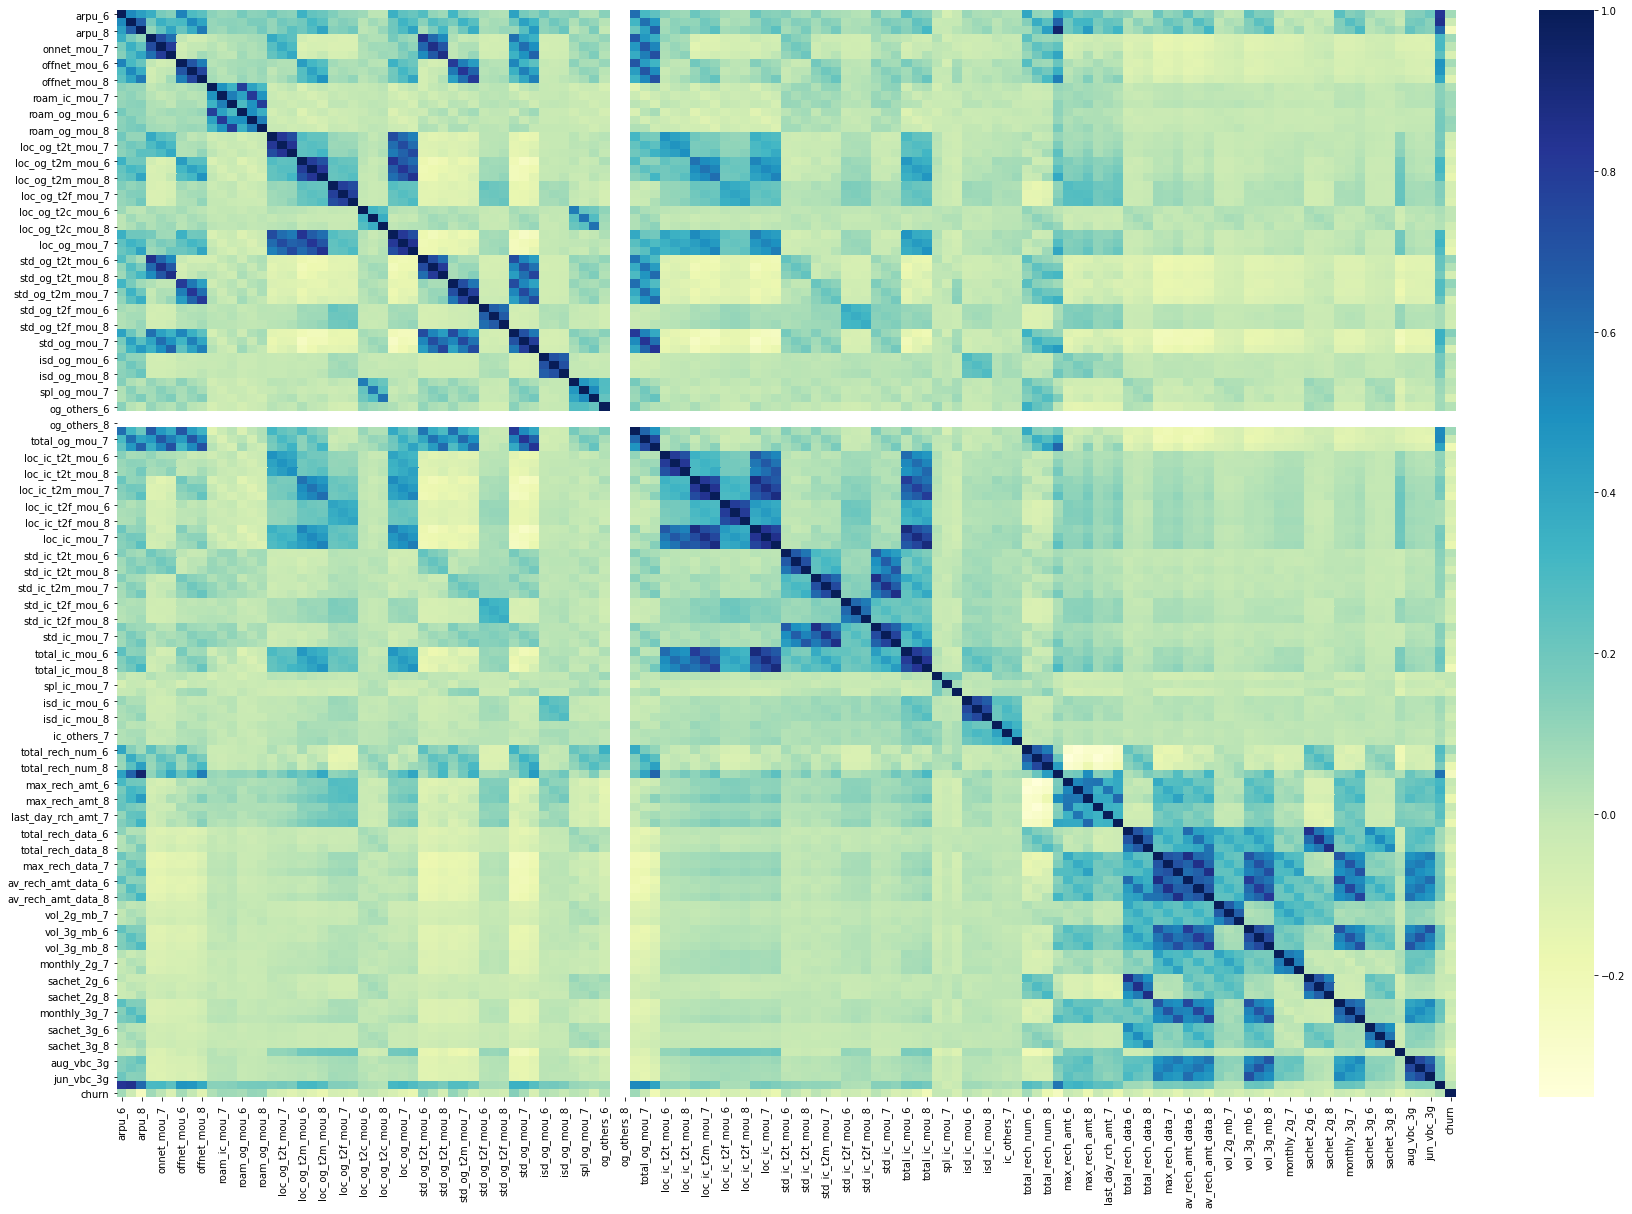

In [30]:
#Getting the Correlation among variables using correlataion plot

correlation = telecom_data_hvc.corr()
plt.figure(figsize = (30,20))
sns.heatmap(correlation, annot = False, cmap="YlGnBu")

there seem to be collineraity among various variables

0    91.363955
1     8.636045
Name: churn, dtype: float64


<AxesSubplot:ylabel='churn'>

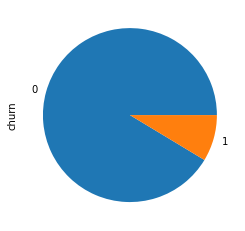

In [31]:
# understanding churn/non churn percentage through pie plot
print((telecom_data_hvc['churn'].value_counts()/len(telecom_data_hvc))*100)
((telecom_data_hvc['churn'].value_counts()/len(telecom_data_hvc))*100).plot(kind="pie")
plt.show()

0    91.363955
1     8.636045
Name: churn, dtype: float64


<AxesSubplot:>

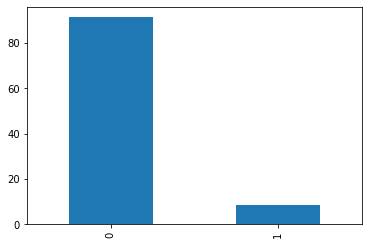

In [32]:
# understanding churn/non churn percentage through bar plot
print((telecom_data_hvc['churn'].value_counts()/len(telecom_data_hvc))*100)
((telecom_data_hvc['churn'].value_counts()/len(telecom_data_hvc))*100).plot(kind="bar")
plt.show()

INFERENCE:
    
    From the above plots we can see distribution of churn rate
    
    There is wide difference in churn and non churn rate.
    
    We can focus on the major one that is restricting the non churn people from churning.

We can see the important features according to the churn rate.

<AxesSubplot:xlabel='churn', ylabel='arpu_8'>

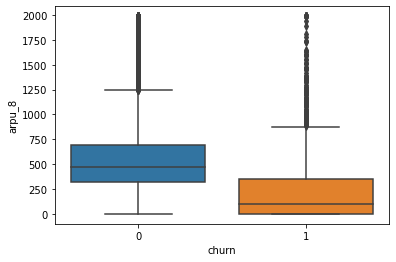

In [33]:
sns.boxplot(x='churn', y='arpu_8', data = telecom_data_hvc)

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_8'>

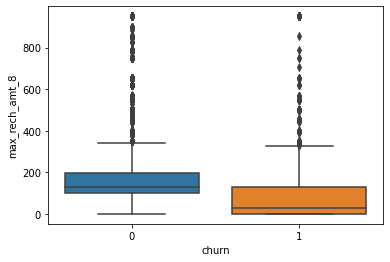

In [34]:
sns.boxplot(x='churn', y='max_rech_amt_8', data = telecom_data_hvc)

INFERENCE:
    
    with deacrese in avg revenue there is increased chance of churning.

<AxesSubplot:xlabel='churn', ylabel='total_ic_mou_8'>

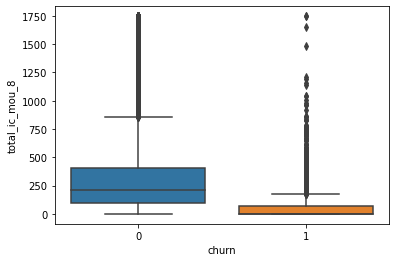

In [35]:
sns.boxplot(x='churn', y='total_ic_mou_8', data = telecom_data_hvc)

INFERENCE: lower the income in month 8 higher is the chance of churn

# Data Preparation

In [36]:
# Importing Sklearn Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Using the StandardScaler

In [37]:
scaler = StandardScaler()
X = telecom_data_hvc.drop(['churn'], axis=1)

y = telecom_data_hvc['churn']
X_scaled = scaler.fit_transform(X)

In [38]:
telecom_data_hvc.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_avg_amt_good,churn
count,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,578.115790,579.93420,524.618925,288.909740,296.580898,261.866393,413.363109,418.408660,373.082685,14.818088,10.647736,10.598445,25.590695,18.618014,17.589295,87.005853,86.958154,79.669254,176.949240,177.581604,166.151190,6.286440,6.406964,5.900735,1.328271,1.539731,1.474835,277.268974,277.966967,259.089428,182.214480,191.929815,164.423

# Train-Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (20985, 132)
y_train: (20985,)
X_test: (8994, 132)
y_test: (8994,)


 Now we will deploy various algorithms on our dataset and predict the best one based on the interpetability and performance  

# Model Building

# Random Forest

In [40]:
#importing sklearn libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [41]:
rf_all = RandomForestClassifier(class_weight='balanced', n_estimators = 1000, max_depth = 6, min_samples_split=5)

trained_rf_all = rf_all.fit(X_train, y_train)

preds_train = trained_rf_all.predict(X_train)
preds_test = trained_rf_all.predict(X_test)

pred_prob_train = trained_rf_all.predict_proba(X_train)[:,1]
pred_prob_test = trained_rf_all.predict_proba(X_test)[:,1]

In [42]:
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

accuracy_train_rf_all
accuracy_test_rf_all

0.9179413867047891

0.9062708472314877

So the accuracy of train set is 91.6%

The accuracy of test set is 90.6%

ROC AUC in train dataset 0.9481092515755577


ROC AUC in test dataset 0.9219251457233358


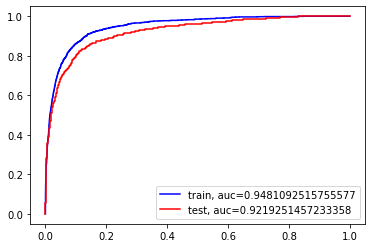

In [43]:
#ROC curve for train dataset

fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_train)
auc_train_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc_train_rf_all)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_train_rf_all), color= 'blue')
plt.legend(loc = 4)

#ROC curve for test dataset

fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_test)
auc_test_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc_test_rf_all)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_test_rf_all), color= 'red')
plt.legend(loc = 4)

Now we will try PCA techniques over our algorithms like Logistic regression with PCA and Random Forest with PCA

# PCA

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. 

In [44]:
pca = PCA(svd_solver = 'randomized', random_state = 50)

# PCA on X_train
pca.fit(X_train)

#fetching PCA Components
pca.components_

PCA(random_state=50, svd_solver='randomized')

array([[ 7.64282922e-02,  8.17793061e-02,  9.69265711e-02, ...,
         1.10753319e-01,  1.05300408e-01,  8.86379636e-02],
       [ 9.54354861e-02,  1.14085103e-01,  1.10358080e-01, ...,
        -1.11191881e-01, -1.08192099e-01,  1.20836514e-01],
       [ 1.36841665e-01,  1.82265402e-01,  1.74904445e-01, ...,
         1.25156075e-01,  1.17241644e-01,  1.78699536e-01],
       ...,
       [-1.17822972e-03,  5.85738460e-03, -2.00316061e-03, ...,
         3.15338492e-04,  1.57956558e-04, -1.62502631e-03],
       [-0.00000000e+00,  1.27392677e-16, -1.41517582e-16, ...,
         9.65277149e-17,  1.19220099e-17,  5.47588180e-17],
       [-0.00000000e+00, -5.41871455e-17,  2.58754907e-17, ...,
         2.46367021e-16, -1.63749763e-16,  9.52172681e-17]])

In [45]:
#Variance ratio
pca.explained_variance_ratio_

array([1.16812523e-01, 9.50295634e-02, 7.45958532e-02, 5.17293866e-02,
       4.53036459e-02, 3.63930729e-02, 2.86350888e-02, 2.80060805e-02,
       2.53541264e-02, 2.44993132e-02, 2.29736374e-02, 2.22560818e-02,
       2.08527190e-02, 1.87590086e-02, 1.70574631e-02, 1.59991903e-02,
       1.52131741e-02, 1.27933627e-02, 1.20452620e-02, 1.13109435e-02,
       1.11867319e-02, 1.08430151e-02, 1.04686648e-02, 9.79728078e-03,
       9.37054323e-03, 8.55582504e-03, 8.25149442e-03, 8.07829702e-03,
       7.92102747e-03, 7.63662501e-03, 6.91954028e-03, 6.90002614e-03,
       6.73166472e-03, 6.56960612e-03, 6.52750167e-03, 6.37712406e-03,
       6.23430569e-03, 5.93333749e-03, 5.87930519e-03, 5.76818978e-03,
       5.59540655e-03, 5.32175829e-03, 5.16377487e-03, 5.01383392e-03,
       4.87229976e-03, 4.73211843e-03, 4.41792946e-03, 4.26557028e-03,
       4.03778348e-03, 3.94867507e-03, 3.73260785e-03, 3.61981207e-03,
       3.55287339e-03, 3.39278538e-03, 3.36587584e-03, 3.09392329e-03,
      

In [46]:
#Importing Sklearn Libraries for PCA 

from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

In [47]:
#PCA on train set
pca_final = IncrementalPCA(n_components=20) 
# taking 20 components for explaining the variances.
X_train_pca = pca_final.fit_transform(X_train) 
X_train_pca.shape

(20985, 20)

In [48]:
#correlation metrics provided by PCA
corr = np.corrcoef(X_train_pca.transpose())
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max_corr:", corr_nodiag.max(), 'and', "min_corr:", corr_nodiag.min(),)

max_corr: 0.0024660597227582548 and min_corr: -0.002424347009935098


From the correlation figure we can infer that there is no multicollinearity or correlation amongst the variables

In [49]:
#PCA on test set

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8994, 20)

# Logistic Regression with PCA

In [50]:
#Creating a Logistic Regression Model with pca
lr_pca = LogisticRegression(class_weight='balanced') 
model_lr_pca = lr_pca.fit(X_train_pca, y_train)

In [51]:
#Predictions on train dataset

pred_train = model_lr_pca.predict_proba(X_train_pca)
y_pred_train = model_lr_pca.predict(X_train_pca)

In [52]:
# Predictions on test dataset
pred_test = model_lr_pca.predict_proba(X_test_pca)
y_pred_test = model_lr_pca.predict(X_test_pca)

In [53]:
#confusion metric
print(confusion_matrix(y_train, y_pred_train))

[[15643  3568]
 [  303  1471]]


In [54]:
#accuracy score of the train dataset.
accuracy_score(y_train, y_pred_train)

0.8155349058851561

In [55]:
#accuracy score of the test dataset.
accuracy_score(y_test, y_pred_test)

0.8144318434511897

In [56]:
y_pred_telecom_data = pd.DataFrame(pred_train) 
#converting array to dataframe
y_pred_telecom_data_test = pd.DataFrame(pred_test)

y_pred = y_pred_telecom_data.iloc[:,[1]] 
#Converting to column dataframe
y_pred_test = y_pred_telecom_data_test.iloc[:,[1]]

y_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_pred_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_train, y_pred], axis=1)
y_pred_final_test = pd.concat([y_test, y_pred_test], axis=1)
 
y_pred_final = y_pred_final.rename(columns = { 1 : 'churn_prob'}) #Renaming the column
y_pred_final_test = y_pred_final_test.rename(columns = { 1 : 'churn_prob'})

# ROC Curve

In [57]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [58]:
#AUC
fpr, tpr, thresholds =roc_curve(y_pred_final.churn, y_pred_final.churn_prob)
auc = auc(fpr, tpr)
print('AUC:', auc)

AUC: 0.8764364377628681


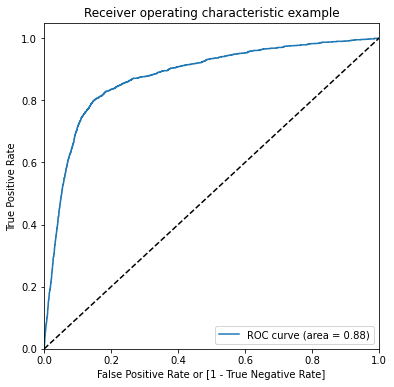

(array([0.        , 0.        , 0.        , ..., 0.99989589, 0.99994795,
        1.        ]),
 array([0.00000000e+00, 5.63697858e-04, 1.12739572e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99916630e+00, 9.99166298e-01, 9.97681799e-01, ...,
        8.95178566e-05, 4.93050886e-05, 1.16845481e-05]))

In [59]:
#ROC Curve

draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [60]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)


In [61]:
#calculating accuracy, sensitivity and specificity corresponding to different cutoffs.
cutoff_telecom = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_telecom.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_telecom)

     prob  accuracy     sensi     speci
0.0   0.0  0.084537  0.000000  1.000000
0.1   0.1  0.338670  0.279996  0.974070
0.2   0.2  0.503693  0.463328  0.940812
0.3   0.3  0.633071  0.607933  0.905299
0.4   0.4  0.738385  0.726146  0.870913
0.5   0.5  0.815535  0.814273  0.829200
0.6   0.6  0.865285  0.874603  0.764374
0.7   0.7  0.892447  0.913903  0.660090
0.8   0.8  0.910746  0.949820  0.487599
0.9   0.9  0.915225  0.980480  0.208568


<AxesSubplot:xlabel='prob'>

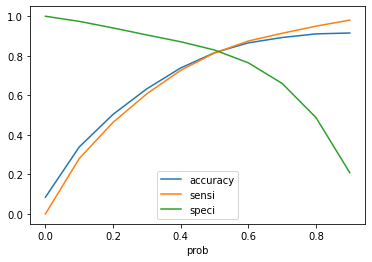

In [62]:
#Plotting accuracy vs. sensitivity vs. specificity to get the optimised cutoff value.

cutoff_telecom.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [63]:
#Threshold Value  

import sys
def Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

#optimal threshold

threshold = Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
threshold

[0.5105788191619175]

This threshold value can be utilised for predicting the churn probability 

In [64]:
#Creating a column 'pred_churn' with value 1 for churn_prob > 0.51

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.51 else 0)

y_pred_final.churn.value_counts()

0    19211
1     1774
Name: churn, dtype: int64

Now we are required to build confusion metrics

In [65]:
#Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.pred_churn)
confusion

array([[15774,  3437],
       [  315,  1459]], dtype=int64)

In [66]:
# overall accuracy.
metrics.accuracy_score(y_train, y_pred_final['pred_churn'])

0.8212056230640934

The accuracy obtained from Logistic Regression with PCA is 82%.

In [67]:
#True positive
TP = confusion[1,1]

#True negative
TN = confusion[0,0]

#False positive
FP = confusion[0,1] 

#False negative
FN = confusion[1,0] 

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.822435174746336

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.8210920826609754

In [70]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17890791733902453


In [71]:
# positive predictive value 
print (TP / float(TP+FP))

0.2979983660130719


In [72]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9804214059295171


So we have obtained various metrics regarding our train datasets

So now we try to obtain all these metrics for our test dataset

In [73]:
y_pred_final_test['pred_churn'] = y_pred_final_test.churn_prob.map( lambda x: 1 if x > 0.50 else 0)
confusion = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.pred_churn)


In [74]:
confusion

array([[6664, 1515],
       [ 154,  661]], dtype=int64)

In [75]:
#true positive
TP = confusion[1,1]
#true negative
TN = confusion[0,0]
#false positive
FP = confusion[0,1]
#false negative
FN = confusion[1,0]

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)
# Let us calculate specificity
TN / float(TN+FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))

0.811042944785276

0.814769531727595

0.18523046827240494
0.3037683823529412
0.9774127310061602


Accuracy score for train and test dataset are close to each other which shows our model is good enough to explain the test data.

Now we will deploy another model to our dataset

# Random Forest with PCA

In [77]:
#importing sklearn libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [78]:
rf_balanced = RandomForestClassifier(class_weight="balanced_subsample", n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [79]:
trained_rf = rf_balanced.fit(X_train_pca, y_train)

In [80]:
pred_rf_train = trained_rf.predict(X_train_pca)
pred_rf_test = trained_rf.predict(X_test_pca)
pred_prob_rf_train = trained_rf.predict_proba(X_train_pca)[:,1]
pred_prob_rf_test = trained_rf.predict_proba(X_test_pca)[:,1]

accuracy_train = metrics.accuracy_score(y_train, pred_rf_train)
accuracy_test = metrics.accuracy_score(y_test, pred_rf_test)

print('Accuracy (train):', accuracy_train)
print('Accuracy (test):', accuracy_test)

classification_report(y_train, pred_rf_train)
classification_report(y_test, pred_rf_test)

Accuracy (train): 0.8641887062187277
Accuracy (test): 0.8592394929953302


'              precision    recall  f1-score   support\n\n           0       0.98      0.87      0.92     19211\n           1       0.36      0.81      0.50      1774\n\n    accuracy                           0.86     20985\n   macro avg       0.67      0.84      0.71     20985\nweighted avg       0.93      0.86      0.89     20985\n'

'              precision    recall  f1-score   support\n\n           0       0.97      0.87      0.92      8179\n           1       0.36      0.74      0.49       815\n\n    accuracy                           0.86      8994\n   macro avg       0.67      0.81      0.70      8994\nweighted avg       0.92      0.86      0.88      8994\n'

AUC (train dataset) 0.9119740504738307


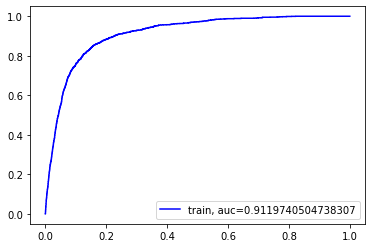

AUC (test dataset) 0.8782595259294153


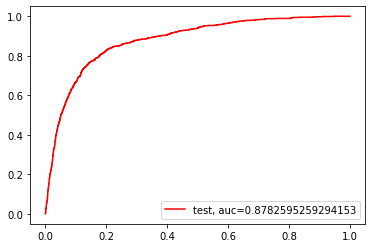

In [81]:
#ROC plot

fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_rf_train)
auc = metrics.auc(fpr, tpr)
print("AUC (train dataset)", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc), color= 'blue')
plt.legend(loc = 4)
plt.show()

#ROC plot in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rf_test)
auc = metrics.auc(fpr, tpr)
print("AUC (test dataset)", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc), color= 'red')
plt.legend(loc = 4)
plt.show()

Random Forest with PCA performs better than the LR with increased accuracy and increased ROC AUC.

# XGBoost

Extreme Gradient Boosting (XGBoost) is similar to the gradient boosting framework but more efficient and advanced implementation of the Gradient Boosting algorithm.



In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [83]:
xgboost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001, n_jobs=-1, max_depth=6, colsample_bytree=1, gamma=0.1,
                            cv = None, scoring='f1_weighted', reg_alpha=0, reg_lambda=1, eval_metric='auc',
                           objective='binary:hinge', booster = 'gbtree', tree_method = 'exact', min_child_weight = 15)

xgb_model = xgboost.fit(X_train, y_train)

[19:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [84]:
preds_train = xgb_model.predict(X_train)
preds_test = xgb_model.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, preds_train)
accuracy_test = metrics.accuracy_score(y_test, preds_test)

print('Accuracy (train):', accuracy_train)
print('Accuracy (test):', accuracy_test)

classification_report(y_train, preds_train)
classification_report(y_test, preds_test)

Accuracy (train): 0.9346199666428401
Accuracy (test): 0.923949299533022


'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96     19211\n           1       0.59      0.73      0.65      1774\n\n    accuracy                           0.93     20985\n   macro avg       0.78      0.84      0.81     20985\nweighted avg       0.94      0.93      0.94     20985\n'

'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96      8179\n           1       0.57      0.67      0.62       815\n\n    accuracy                           0.92      8994\n   macro avg       0.77      0.81      0.79      8994\nweighted avg       0.93      0.92      0.93      8994\n'

AUC (train dataset) 0.8427757590496379


AUC (test dataset) 0.8118089345975816


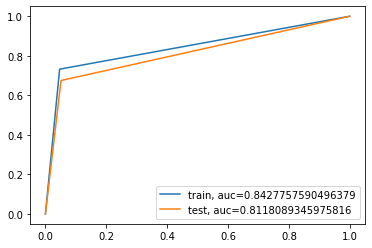

In [85]:
#ROC curve(train)

fpr, tpr, threshold = metrics.roc_curve(y_train, preds_train)
auc = metrics.auc(fpr, tpr)
print("AUC (train dataset)", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)

#ROC curve (test)

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_test)
auc = metrics.auc(fpr, tpr)
print("AUC (test dataset)", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)

In [86]:
print('train set accuracy:', accuracy_train_rf_all)

print('test set accuracy:', accuracy_test_rf_all)




train set accuracy: 0.9179413867047891
test set accuracy: 0.9062708472314877


In [87]:
#Important variables for our analysis based on the random forest

importances = trained_rf_all.feature_importances_
cols = X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True))

#top 10 features
sorted_feature_importance.head(10) 

,0,1
0,0.108366,total_ic_mou_8
1,0.087603,total_og_mou_8
2,0.073494,total_rech_amt_8
3,0.068603,arpu_8
4,0.063616,last_day_rch_amt_8
5,0.043621,loc_ic_t2m_mou_8
6,0.042378,loc_ic_mou_8
7,0.041257,max_rech_amt_8
8,0.039788,roam_og_mou_8
9,0.038360,roam_ic_mou_8


Here we got the top 10 features of importance

# Conclusions:


Based on the roc curve we can say that Random Forest performed best among the various models with high AUC value.

Important features for our analysis are:
    
    1. total_ic_mou_8
    
    2. total_og_mou_8
    
    3. total_rech_amt_8
    
    4. arpu_8

Churn probability majorly depends on the 8th month variables

Churn rate increases on decreasing avg revenue per user

Churn rate increases on decreasing tatal income of month8

Churn rate also depends on the total recharge amount of 8th month

